In [9]:
# Data Import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [41]:
data = pd.read_csv("./data.csv")
pd.set_option('display.max_columns', None)
print(data.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

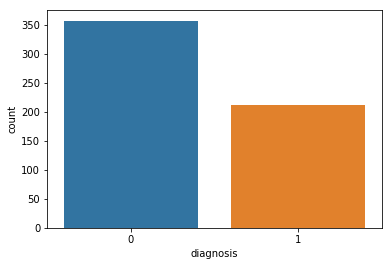

In [4]:
# divide data into three groups based on their ends up
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])

# Data cleaning
# Get rid of IDs
data.drop("id",axis=1,inplace=True)
# Let B = 0 for benign and M = 1 for tumor
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

# Data Visualization
sns.countplot(data['diagnosis'], label='count')
plt.show()

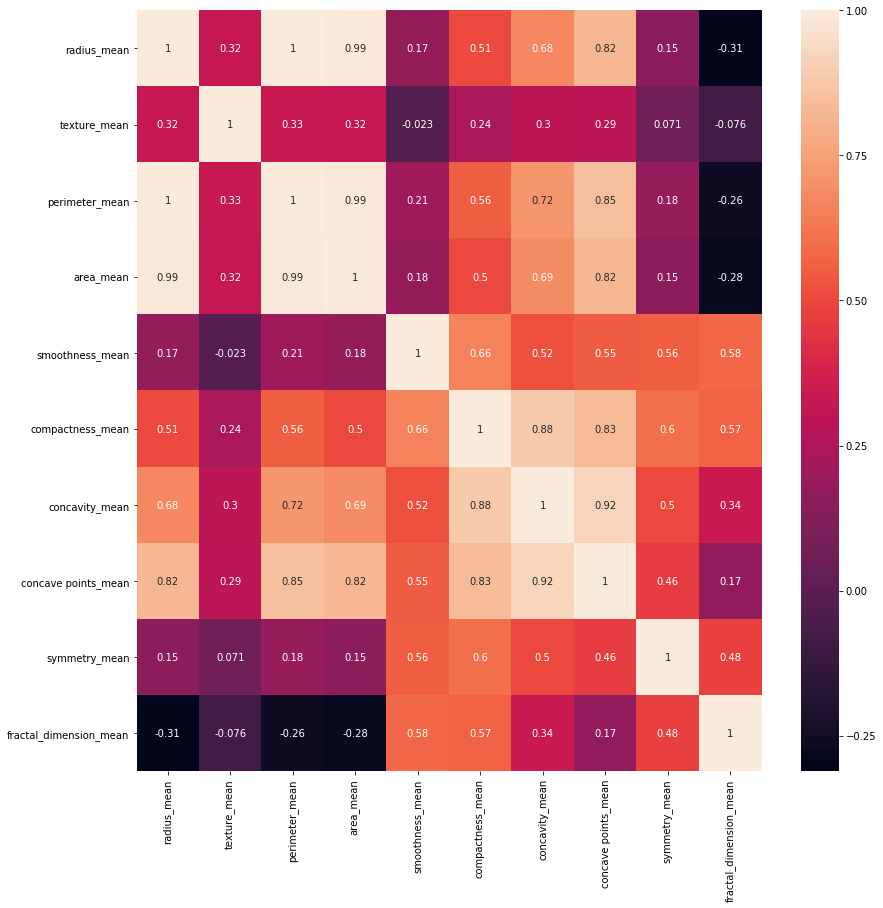

In [43]:
# Correlation of feature mean Display using HeatMap
corr_mean = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True show all the number on blocks
sns.heatmap(corr_mean, annot=True)
plt.show()

In [30]:
# Feature Selection
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 


In [31]:
# 30% Test Set, 70% Training Set
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# Select the features_remain data from dataset for training and testing
train_X = train[features_remain]
train_y = train['diagnosis']
test_X = test[features_remain]
test_y = test['diagnosis']

In [32]:
# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [33]:
# SVM classifier
model = svm.SVC()
# Training 
model.fit(train_X,train_y)
# Testing
prediction=model.predict(test_X)
print('accuracy for mean: ', metrics.accuracy_score(prediction,test_y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

accuracy for mean:  0.9473684210526315


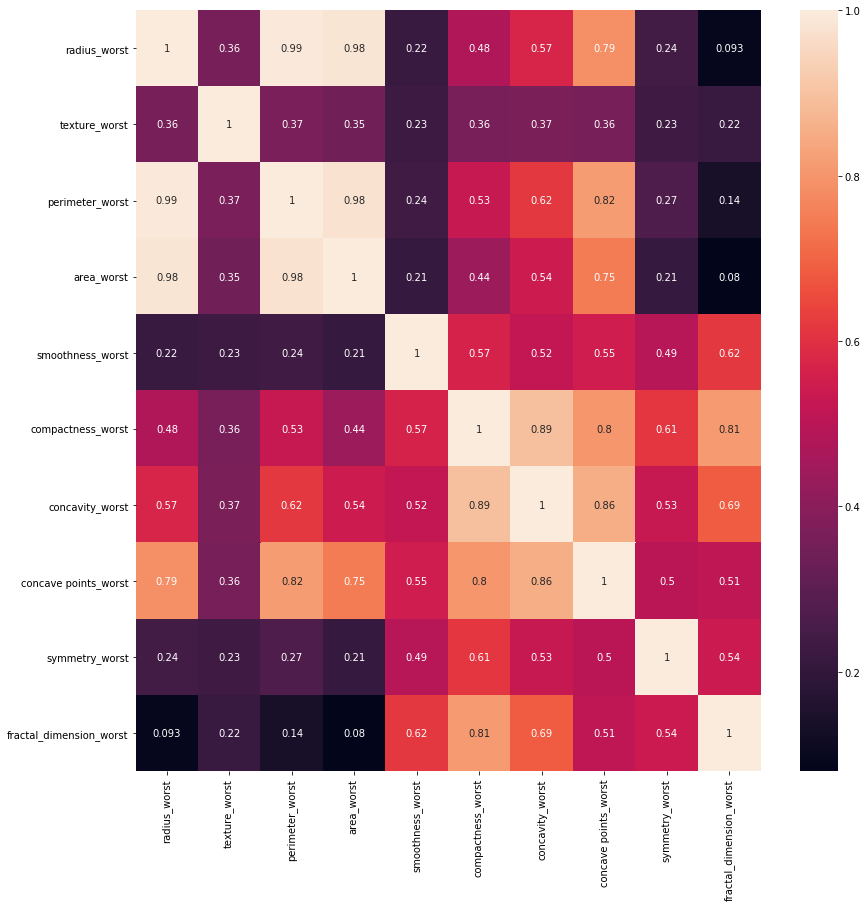

In [21]:
# Correlation se Display using HeatMap
corr_worst = data[features_worst].corr()
plt.figure(figsize=(14,14))
# annot=True show all the blocks
sns.heatmap(corr_worst, annot=True)
plt.show()

In [34]:
# Now we do this using the worst data. Cuz the worst part may be the most possible part for tumor
# Feature Selection
features_worst = ['radius_worst','texture_worst', 'smoothness_worst','compactness_worst','symmetry_worst', 'fractal_dimension_worst'] 


In [35]:
# 30% Test Set, 70% Training Set
#train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# Select the features_remain data from dataset for training and testing
train_X_worst = train[features_worst]
train_y_worst = train['diagnosis']
test_X_worst = test[features_worst]
test_y_worst = test['diagnosis']

In [38]:
# Use Z-Score standard scaler to ensure the mean of each feature dimension to 0, sd = 1
ss_worst = StandardScaler()
train_X_worst = ss_worst.fit_transform(train_X_worst)
test_X_worst = ss_worst.transform(test_X_worst)

In [40]:
# SVM classifier
model_worst = svm.SVC()
# Training 
model_worst.fit(train_X_worst,train_y_worst)
# Testing
prediction_worst = model_worst.predict(test_X_worst)
print('accuracy for worst data: ', metrics.accuracy_score(prediction_worst, test_y_worst))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

accuracy for worst data:  0.9590643274853801
